In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore")


from statsmodels.stats.outliers_influence import variance_inflation_factor

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# data splitting
from sklearn.model_selection import train_test_split

# scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

# encoding
from sklearn.preprocessing import OneHotEncoder
from category_encoders import OrdinalEncoder, BinaryEncoder

# missing value treatment
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer, KNNImputer

# columns transformer
from sklearn.compose import ColumnTransformer

# pipeline (menggabungkan beberapa tahapan jadi 1)
from sklearn.pipeline import Pipeline

# modeling
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor


#cross validation
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.base import clone

#hyper parameter
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# evaluation
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,classification_report,confusion_matrix,precision_recall_curve,roc_curve
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,classification_report,confusion_matrix,precision_recall_curve,roc_curve, root_mean_squared_error,mean_absolute_error,mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

import shap
from joblib import dump, load


# **Prediksi Valuasi Pemain Sepak Bola Posisi Gelandang Serang (CAM)**
---

# **Tentang Project**

Dalam industri sepak bola modern, penentuan nilai pasar pemain menjadi aspek krusial dalam strategi transfer dan manajemen tim. Nilai ini dipengaruhi oleh berbagai faktor seperti usia, performa, potensi, serta atribut teknis dan fisik. Dengan ketersediaan data lengkap dari platform seperti SoFIFA, muncul peluang untuk memanfaatkan machine learning dalam memprediksi market value pemain secara lebih objektif dan berbasis data.

Proyek ini bertujuan membangun model prediksi nilai pasar pemain menggunakan data atribut yang tersedia di SoFIFA, seperti kemampuan passing, shooting, dribbling, kecepatan, dan lain-lain. Model ini diharapkan mampu mengidentifikasi faktor-faktor yang paling berpengaruh terhadap value seorang pemain dan memberikan estimasi nilai yang akurat. Hasil dari model ini dapat digunakan oleh klub, scout, maupun analis sepak bola untuk pengambilan keputusan yang lebih strategis dan data-driven dalam aktivitas transfer.

Pada kesempatan kali ini, machine learning akan berfokus pada pemain berposisi Gelandang Serang (CAM). Ini dikarenakan, setiap pemain bola memiliki faktor valuasi yang berbeda-beda, jadi tidak bisa digabungkan prediksi untuk setiap posisinya.

# **Tentang Data**
- Data berasal dari Kaggle: https://www.kaggle.com/datasets/yorkyong/football-player-statistics/data

- Menurut pemilik data, data ini adalah hasil *scrapping* dari situs https://sofifa.com. SoFIFA adalah platform daring yang menyediakan database lengkap mengenai rating pemain dalam seri permainan video EA Sports FC (sebelumnya dikenal sebagai FIFA), termasuk statistik, atribut, dan potensi pemain. Situs ini sangat populer di kalangan penggemar permainan mode karier dan mode Ultimate Team karena kemampuannya untuk menampilkan data pemain secara detail dan terstruktur.

- Tidak terdapat kapan waktu pengambilan data yang jelas, namun jika melihat dari tanggal unggah, maka diperkirakan data ini diambil tahun 2024.


---
# **Machine Learning: Prediksi Valuasi Pemain Sepak Bola Posisi Gelandang Serang (CAM)**
---

## **Memahami Data**

In [5]:
df = pd.read_csv(r"D:\Satrio\Data Science\Modul 3\Portofolio Data\archive\players_3120.csv")
df.sample(10)

,name,Age,Overall rating,Potential,Team & Contract,ID,Height,Weight,foot,Best overall,Best position,Growth,Value,Wage,Release clause,Total attacking,Crossing,Finishing,Heading accuracy,Short passing,Volleys,Total skill,Dribbling,Curve,FK Accuracy,Long passing,Ball control,Total movement,Acceleration,Sprint speed,Agility,Reactions,Balance,Total power,Shot power,Jumping,Stamina,Strength,Long shots,Total mentality,Aggression,Interceptions,Att. Position,Vision,Penalties,Composure,Total defending,Defensive awareness,Standing tackle,Sliding tackle,Total goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total stats,Base stats,International reputation,Pace / Diving,Shooting / Handling,Passing / Kicking,Dribbling / Reflexes,Defending / Pace,Unnamed: 64
1261,C. O'Hare CAM,25,74,79,Coventry City\n2020 ~ 2024,238058,"173cm / 5'8""",65kg / 143lbs,Right,76,CAM,5,€6M,€35K,€11.9M,321,65,69,51,75,61,342,78,68,52,69,75,401,81,79,83,71,87,315,63,62,84,47,59,357,79,64,74,72,68,78,188,62,65,61,58,11,7,11,14,15,1982,419,1,80,66,70,78,62,NaN
1845,M. Hilgers CB,22,74,83,FC Twente\n2020 ~ 2026,259163,"186cm / 6'1""",78kg / 172lbs,Right,76,CB,9,€9M,€9K,€15.3M,239,33,42,69,69,26,239,57,30,27,67,58,334,74,69,62,68,61,318,62,79,76,75,26,295,76,75,35,49,60,69,228,75,78,75,55,9,10,14,12,10,1708,377,1,71,43,53,59,75,NaN
2097,S. Mané LM RM CF,31,85,85,Al Nassr\n2023 ~ 2027,208722,"174cm / 5'9""",69kg / 152lbs,Right,85,LM,0,€44.5M,€74K,€71.2M,397,78,83,78,83,75,383,85,77,64,71,86,426,82,83,86,87,88,395,85,84,79,70,77,350,75,35,84,81,75,84,122,42,42,38,56,10,10,15,7,14,2129,447,4,83,81,79,86,44,NaN
1837,I. Grbić GK,27,75,78,Sheffield United\n2024 ~ 2027,258390,"195cm / 6'5""",93kg / 205lbs,Right,75,GK,3,€5.5M,€24K,€11.4M,77,14,9,11,35,8,101,15,20,13,32,21,187,34,28,30,71,24,227,56,64,27,73,7,112,27,15,9,42,19,33,38,13,13,12,370,76,71,74,73,76,1112,402,1,76,71,74,76,32,NaN
1143,J. Shelvey CM CDM,31,75,75,"Rizespor\nJun 30, 2024 On loan",189165,"184cm / 6'0""",80kg / 176lbs,Right,75,CM,0,€4.6M,€53K,€0,346,75,60,63,82,66,377,72,69,73,86,77,258,43,32,51,69,63,353,85,65,55,71,77,360,83,64,62,80,71,78,181,60,63,58,64,14,11,15,8,16,1939,388,2,37,69,80,71,62,NaN
3033,Y. Özcan LB CB,17,63,77,Kasımpaşa\n2022 ~ 2026,271362,"185cm / 6'1""",75kg / 165lbs,Left,66,CB,14,€1M,€500,€2.6M,211,47,25,60,57,22,217,52,40,20,47,58,303,63,67,62,58,53,297,62,67,69,64,35,242,70,63,38,28,43,58,194,66,65,63,45,7,13,6,11,8,1509,332,1,65,36,45,55,64,NaN
6,Y. Moukoko ST,18,77,87,Borussia Dortmund\n2020 ~ 2026,240833,"179cm / 5'10""",72kg / 159lbs,Left,79,ST,10,€22.5M,€18K,€42.8M,343,47,79,69,71,77,318,79,68,42,48,81,409,82,79,85,77,86,360,78,79,68,68,67,281,52,32,78,59,60,75,86,30,31,25,60,13,13,11,10,13,1857,393,2,80,75,59,80,34,NaN
903,23 M. Özil CAM RM,33,77,77,İstanbul Başakşehir\n2022 ~ 2023,176635,"180cm / 5'11""",70kg / 154lbs,Left,77,CAM,0,€6.5M,€37K,€13M,365,82,70,51,85,77,397,78,84,75,80,80,351,69,68,75,65,74,250,68,33,40,43,66,296,44,14,77,82,79,85,51,16,16,19,50,6,14,10,6,14,1760,360,4,68,70,83,78,19,NaN
2593,G. Kerk RM ST,27,72,72,Antwerp\n2023 ~ 2025,225653,"183cm / 6'0""",90kg / 198lbs,Right,72,RM,0,€2.5M,€21K,€3.8M,330,66,72,60,65,67,314,73,67,53,52,69,396,84,90,76,70,76,367,76,83,64,78,66,294,63,32,74,66,59,68,90,38,29,23,68,12,15,12,15,14,1859,400,1,87,71,63,72,35,NaN
532,E. Fernández CDM CM,20,73,81,Boca Juniors\n2021 ~ 2025,262151,"178cm / 5'10""",76kg / 168lbs,Left,74,CDM,8,€6.5M,€10K,€11.1M,271,49,38,60,76,48,313,72,49,47,75,70,355,70,67,71,68,79,345,58,76,78,79,54,308,76,69,48,69,46,73,212,68,72,72,47,6,7,7,14,13,1851,400,1,68,47,66,72,69,NaN


| Nama Kolom               | Deskripsi / Arti                                                                              |
|-------------------------|----------------------------------------------------------------------------------------------|
| name                    | Nama lengkap pemain dan posisi utama yang dimainkan (misal CAM, ST)                          |
| Age                     | Umur pemain                                                                                   |
| Overall rating          | Rating keseluruhan kemampuan pemain pada posisi utamanya                                    |
| Potential               | Rating potensi kemampuan tertinggi yang bisa dicapai pemain di masa depan                    |
| Team & Contract         | Klub saat ini dan durasi kontrak pemain (tahun mulai ~ tahun berakhir)                      |
| ID                      | ID unik pemain dalam database                                                                |
| Height                  | Tinggi badan pemain, biasanya dalam format cm dan feet/inci (misal 182cm / 6'0")             |
| Weight                  | Berat badan pemain, biasanya dalam kg dan lbs (misal 76kg / 168lbs)                          |
| foot                    | Kaki dominan pemain (Right = kanan, Left = kiri)                                            |
| Best overall            | Rating tertinggi jika pemain dimainkan di posisi terbaiknya                                 |
| Best position           | Posisi paling cocok berdasarkan atribut dan performa pemain                                 |
| Growth                  | Selisih antara Potential dan Overall rating, menunjukkan potensi perkembangan               |
| Value                   | Nilai pasar pemain dalam mata uang Euro (misal €4.1M)                                      |
| Wage                    | Gaji mingguan pemain dalam Euro (misal €45K)                                               |
| Release clause          | Nilai klausa pelepasan kontrak jika dibeli klub lain (misal €0 berarti tidak ada klausa)    |
| Total attacking         | Total skor dari semua atribut yang berhubungan dengan kemampuan menyerang                   |
| Crossing                | Kemampuan mengirim umpan silang yang akurat                                                 |
| Finishing               | Kemampuan menyelesaikan peluang gol                                                        |
| Heading accuracy        | Akurasi sundulan bola saat duel udara                                                      |
| Short passing           | Kemampuan mengirim umpan jarak pendek                                                      |
| Volleys                 | Kemampuan menembak bola langsung di udara                                                  |
| Total skill             | Total skor dari atribut-atribut skill individu (seperti dribbling, curve, fk accuracy)     |
| Dribbling               | Kemampuan menggiring bola                                                                  |
| Curve                   | Kemampuan melengkungkan bola saat tembakan atau umpan                                     |
| FK Accuracy             | Akurasi tendangan bebas langsung                                                          |
| Long passing            | Kemampuan mengirim umpan jarak jauh                                                       |
| Ball control            | Kontrol bola saat menerima atau menggiring                                                |
| Total movement          | Total skor dari atribut mobilitas pemain                                                  |
| Acceleration            | Kecepatan awal saat mulai berlari                                                         |
| Sprint speed            | Kecepatan maksimal saat berlari                                                           |
| Agility                 | Kelincahan pemain saat bergerak atau menggiring                                           |
| Reactions               | Kecepatan merespon situasi di lapangan                                                   |
| Balance                 | Keseimbangan tubuh pemain saat bergerak atau di bawah tekanan                             |
| Total power             | Total skor dari atribut fisik dan kekuatan                                                |
| Shot power              | Kekuatan tembakan pemain                                                                  |
| Jumping                 | Kemampuan melompat saat duel udara                                                        |
| Stamina                 | Ketahanan fisik pemain selama pertandingan                                                |
| Strength                | Kekuatan fisik dalam duel atau duel udara                                                |
| Long shots              | Kemampuan menembak dari jarak jauh                                                       |
| Total mentality         | Total skor atribut yang berkaitan dengan mentalitas pemain                                |
| Aggression              | Tingkat agresif dalam duel dan tekanan                                                   |
| Interceptions           | Kemampuan memotong atau menghalau umpan lawan                                            |
| Att. Position           | Kecerdasan posisi saat menyerang                                                        |
| Vision                  | Kemampuan melihat peluang umpan dan pergerakan rekan                                     |
| Penalties               | Kemampuan mengeksekusi tendangan penalti                                                |
| Composure               | Ketangkasan dan ketenangan saat dalam tekanan                                           |
| Total defending         | Total skor dari semua atribut bertahan                                                  |
| Defensive awareness     | Pemahaman taktik bertahan                                                                |
| Standing tackle         | Kemampuan merebut bola sambil berdiri                                                   |
| Sliding tackle          | Kemampuan merebut bola dengan sliding                                                   |
| Total goalkeeping       | Total skor dari semua atribut kiper                                                    |
| GK Diving               | Kemampuan kiper terbang menepis bola                                                   |
| GK Handling             | Kemampuan kiper menangkap dan mengamankan bola                                         |
| GK Kicking              | Kekuatan dan akurasi tendangan kiper                                                  |
| GK Positioning          | Posisi kiper saat mengantisipasi tembakan                                             |
| GK Reflexes             | Refleks cepat kiper saat menyelamatkan bola                                           |
| Total stats             | Jumlah dari semua atribut pemain (menjadi skor keseluruhan)                            |
| Base stats              | Jumlah atribut dasar (biasanya atribut non-posisional)                                |
| International reputation| Reputasi pemain di level internasional, skala 1–5                                    |
| Pace / Diving           | Rating gabungan kecepatan untuk pemain atau diving untuk kiper                       |
| Shooting / Handling     | Rating gabungan kemampuan tembakan untuk pemain atau handling untuk kiper            |
| Passing / Kicking       | Rating gabungan kemampuan passing untuk pemain atau kicking untuk kiper              |
| Dribbling / Reflexes    | Rating gabungan kemampuan dribbling untuk pemain atau refleks untuk kiper            |
| Defending / Pace        | Rating gabungan kemampuan bertahan untuk pemain atau kecepatan untuk kiper           |


## **Membersihkan Data**
1. Mengecek nilai missing value dan menanggulanginya
2. Mengecek nilai duplikat dan menanggulanginya
3. Mengecek tipe data dan anomali data pada isi data

In [6]:
df_clean = df.copy()

### Missing value

In [7]:
df_clean.isna().sum()

name                           0
Age                            0
Overall rating                 0
Potential                      0
Team & Contract                0
ID                             0
Height                         0
Weight                         0
foot                           0
Best overall                   0
Best position                  0
Growth                         0
Value                          0
Wage                           0
Release clause                 0
Total attacking                0
Crossing                       0
Finishing                      0
Heading accuracy               0
Short passing                  0
Volleys                        0
Total skill                    0
Dribbling                      0
Curve                          0
FK Accuracy                    0
Long passing                   0
Ball control                   0
Total movement                 0
Acceleration                   0
Sprint speed                   0
Agility   

Tidak terdapat missing value pada data kecuali kolom `Unnamed:64`. Maka dari itu, kolom ini bisa di-drop, karena tidak memiliki informasi apapun terkait dengan data.

In [8]:
df_clean = df_clean.drop(columns="Unnamed: 64")

### Duplikat

In [9]:
df_clean.duplicated().sum()

np.int64(371)

Terdapat 371 data terduplikat. Pada bagian ini, diperbolehkan untuk menghapus data-data yang duplikat. Hal ini didasari terdapat kolom Nama dan ID yang seharusnya bisa menjadi acuan sebagai nilai unik. Untuk itu, data duplikat bisa dihapus.

In [10]:
df_clean = df_clean.drop_duplicates()

### Tipe data dan anomali data pada isi data

In [11]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2749 entries, 0 to 3111
Data columns (total 64 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   name                      2749 non-null   object
 1   Age                       2749 non-null   int64 
 2   Overall rating            2749 non-null   object
 3   Potential                 2749 non-null   object
 4   Team & Contract           2749 non-null   object
 5   ID                        2749 non-null   int64 
 6   Height                    2749 non-null   object
 7   Weight                    2749 non-null   object
 8   foot                      2749 non-null   object
 9   Best overall              2749 non-null   int64 
 10  Best position             2749 non-null   object
 11  Growth                    2749 non-null   int64 
 12  Value                     2749 non-null   object
 13  Wage                      2749 non-null   object
 14  Release clause            274

#### 1. Kejanggalan pada kolom `name`
Kolom `name` memiliki kejanggalan informasi. Selain memuat informasi tentang nama pemain, ternyata kolom `Name` memuat informasi tentang posisi pemain saat ini. Untuk itu, bagian yang menandakan informasi posisi pemain bisa dihilangkan saja. 

In [12]:
#Menghilangkan posisi pemain menggunakan Regex
df_clean["name"] = df_clean["name"].str.replace(r'([A-Z]{2,3}\s*)+', '', regex=True).str.strip()

#### 2. Kejanggalan pada kolom `Team & Contract`
Kolom ini juga memiliki kejanggalan karena berisi 2 informasi yang seharusnya bisa dipisah untuk nantinya memudahkan proses machine learning. Maka kolom ini akan menjadi 2 kolom baru, yaitu kolom `Team` dan `Contract`.


In [13]:
df.head()

,name,Age,Overall rating,Potential,Team & Contract,ID,Height,Weight,foot,Best overall,Best position,Growth,Value,Wage,Release clause,Total attacking,Crossing,Finishing,Heading accuracy,Short passing,Volleys,Total skill,Dribbling,Curve,FK Accuracy,Long passing,Ball control,Total movement,Acceleration,Sprint speed,Agility,Reactions,Balance,Total power,Shot power,Jumping,Stamina,Strength,Long shots,Total mentality,Aggression,Interceptions,Att. Position,Vision,Penalties,Composure,Total defending,Defensive awareness,Standing tackle,Sliding tackle,Total goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total stats,Base stats,International reputation,Pace / Diving,Shooting / Handling,Passing / Kicking,Dribbling / Reflexes,Defending / Pace,Unnamed: 64
0,15 Ronaldinho CAM ST,34,78,78,Querétaro\n2014 ~ 2016,28130,"182cm / 6'0""",76kg / 168lbs,Right,77,CAM,0,€4.1M,€45K,€0,367,84,69,50,82,82,430,86,86,87,81,90,313,50,48,73,70,72,314,74,55,41,72,72,319,60,25,66,82,86,0,78,25,28,25,54,7,14,13,6,14,1875,377,3,49,72,83,84,28,NaN
1,O. Hutchinson RM CAM,19,65,81,Ipswich Town\n2022 ~ 2025,260145,"174cm / 5'9""",65kg / 143lbs,Left,67,CAM,16,€1.8M,€3K,€4.5M,266,48,53,49,66,50,304,69,52,50,65,68,366,76,69,81,61,79,272,62,56,63,47,44,264,41,37,60,65,61,63,140,40,49,51,39,10,7,9,5,8,1651,351,1,72,54,61,70,44,NaN
2,Brahim CAM,23,82,86,Real Madrid\n2019 ~ 2027,231410,"170cm / 5'7""",68kg / 150lbs,Right,84,CAM,4,€43.5M,€145K,€92.4M,328,75,76,30,83,64,379,84,74,61,75,85,429,85,85,89,79,91,332,73,60,68,55,76,294,44,33,78,81,58,79,84,40,23,21,51,13,9,13,10,6,1897,409,1,85,74,78,85,31,NaN
3,K. Wätjen CM,17,62,80,Borussia Dortmund\n2024 ~ 2028,70728,"178cm / 5'10""",72kg / 159lbs,Right,65,CAM,18,€1M,€900,€2.3M,257,48,53,45,67,44,292,66,52,43,65,66,356,77,68,78,59,74,267,48,58,63,51,47,263,47,54,54,59,49,49,161,50,55,56,48,9,13,7,11,8,1644,353,1,72,50,59,66,52,NaN
4,A. Güler CAM RM,18,77,88,Real Madrid\n2023 ~ 2029,264309,"175cm / 5'9""",70kg / 154lbs,Left,79,CAM,11,€22M,€41K,€49.5M,340,80,68,41,81,70,403,83,84,76,79,81,380,75,69,82,69,85,308,72,50,70,43,73,316,42,55,68,80,71,77,155,52,57,46,58,13,10,11,14,10,1960,405,1,72,70,80,81,52,NaN


In [14]:
df_clean[['Team', 'Contract']] = df_clean['Team & Contract'].str.split('\n', expand=True)
df_clean = df_clean.drop(columns=['Team & Contract'])

In [15]:
df_clean.head()

,name,Age,Overall rating,Potential,ID,Height,Weight,foot,Best overall,Best position,Growth,Value,Wage,Release clause,Total attacking,Crossing,Finishing,Heading accuracy,Short passing,Volleys,Total skill,Dribbling,Curve,FK Accuracy,Long passing,Ball control,Total movement,Acceleration,Sprint speed,Agility,Reactions,Balance,Total power,Shot power,Jumping,Stamina,Strength,Long shots,Total mentality,Aggression,Interceptions,Att. Position,Vision,Penalties,Composure,Total defending,Defensive awareness,Standing tackle,Sliding tackle,Total goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total stats,Base stats,International reputation,Pace / Diving,Shooting / Handling,Passing / Kicking,Dribbling / Reflexes,Defending / Pace,Team,Contract
0,15 Ronaldinho,34,78,78,28130,"182cm / 6'0""",76kg / 168lbs,Right,77,CAM,0,€4.1M,€45K,€0,367,84,69,50,82,82,430,86,86,87,81,90,313,50,48,73,70,72,314,74,55,41,72,72,319,60,25,66,82,86,0,78,25,28,25,54,7,14,13,6,14,1875,377,3,49,72,83,84,28,Querétaro,2014 ~ 2016
1,O. Hutchinson,19,65,81,260145,"174cm / 5'9""",65kg / 143lbs,Left,67,CAM,16,€1.8M,€3K,€4.5M,266,48,53,49,66,50,304,69,52,50,65,68,366,76,69,81,61,79,272,62,56,63,47,44,264,41,37,60,65,61,63,140,40,49,51,39,10,7,9,5,8,1651,351,1,72,54,61,70,44,Ipswich Town,2022 ~ 2025
2,Brahim,23,82,86,231410,"170cm / 5'7""",68kg / 150lbs,Right,84,CAM,4,€43.5M,€145K,€92.4M,328,75,76,30,83,64,379,84,74,61,75,85,429,85,85,89,79,91,332,73,60,68,55,76,294,44,33,78,81,58,79,84,40,23,21,51,13,9,13,10,6,1897,409,1,85,74,78,85,31,Real Madrid,2019 ~ 2027
3,K. Wätjen,17,62,80,70728,"178cm / 5'10""",72kg / 159lbs,Right,65,CAM,18,€1M,€900,€2.3M,257,48,53,45,67,44,292,66,52,43,65,66,356,77,68,78,59,74,267,48,58,63,51,47,263,47,54,54,59,49,49,161,50,55,56,48,9,13,7,11,8,1644,353,1,72,50,59,66,52,Borussia Dortmund,2024 ~ 2028
4,A. Güler,18,77,88,264309,"175cm / 5'9""",70kg / 154lbs,Left,79,CAM,11,€22M,€41K,€49.5M,340,80,68,41,81,70,403,83,84,76,79,81,380,75,69,82,69,85,308,72,50,70,43,73,316,42,55,68,80,71,77,155,52,57,46,58,13,10,11,14,10,1960,405,1,72,70,80,81,52,Real Madrid,2023 ~ 2029


In [16]:
df_clean["Contract"]

0                2014 ~ 2016
1                2022 ~ 2025
2                2019 ~ 2027
3                2024 ~ 2028
4                2023 ~ 2029
5                2021 ~ 2026
6                2020 ~ 2026
7                2023 ~ 2028
8                2023 ~ 2029
9                2022 ~ 2025
10               2022 ~ 2028
11               2012 ~ 2024
12               2023 ~ 2030
13               2023 ~ 2028
14      Jun 30, 2024 On loan
15               2022 ~ 2025
16               2023 ~ 2026
17               2023 ~ 2028
18               2022 ~ 2028
19               2023 ~ 2028
20               2020 ~ 2027
21               2021 ~ 2028
22               2024 ~ 2031
23               2018 ~ 2027
24               2022 ~ 2026
25               2022 ~ 2029
26               2022 ~ 2029
27               2022 ~ 2027
28               2022 ~ 2027
29               2023 ~ 2026
30               2022 ~ 2028
31               2023 ~ 2025
32               2023 ~ 2025
33               2021 ~ 2026
34            

Setelah diperhatikan, setidaknya terdapat 3 tipe kontrak:
1. Full Contract → Format: "YYYY ~ YYYY"

2. Loan → Format: Mengandung kata "loan" (misalnya "Jun 30, 2024 On loan")

3. Free Transfer → Format: "Free"

Untuk itu, bagian ini bisa dijadikan kategori saja untuk mempermudah pengkategorian

In [17]:
def categorize_contract(value):
    if isinstance(value, str):
        value = value.lower().strip()
        if 'loan' in value:
            return 'Loan'
        elif 'free' in value:
            return 'Free Transfer'
        elif ' ~ ' in value:
            return 'Full Contract'
    return 'Unknown'

df_clean['contract_type'] = df_clean['Contract'].apply(categorize_contract)
df_clean = df_clean.drop(columns="Contract")

#### 3. Kejanggalan pada kolom `Height` dan `Weight`
Pada kolom `Height` (tinggi badan) dan `Weight` (berat badan) terdapat masing-masing 2 satuan.
1. Height: cm dan inci
2. Weight: kg dan lbs

maka dari itu, perlu diambil 1 satuan saja, untuk masing-masing kolom. `Height` hanya ambil yang cm, dan `Weight` ambil yang kg

In [18]:
df_clean["Height (cm)"] = df_clean["Height"].str.split().str[0]
df_clean["Height (cm)"] = df_clean["Height"].str.split('cm').str[0].astype(int)
df_clean = df_clean.drop(columns=['Height'])

In [19]:
df_clean["Weight (kg)"] = df_clean["Weight"].str.split().str[0]
df_clean["Weight (kg)"] = df_clean["Weight"].str.split('kg').str[0].astype(int)
df_clean = df_clean.drop(columns=['Weight'])

In [20]:
df_clean.head()

,name,Age,Overall rating,Potential,ID,foot,Best overall,Best position,Growth,Value,Wage,Release clause,Total attacking,Crossing,Finishing,Heading accuracy,Short passing,Volleys,Total skill,Dribbling,Curve,FK Accuracy,Long passing,Ball control,Total movement,Acceleration,Sprint speed,Agility,Reactions,Balance,Total power,Shot power,Jumping,Stamina,Strength,Long shots,Total mentality,Aggression,Interceptions,Att. Position,Vision,Penalties,Composure,Total defending,Defensive awareness,Standing tackle,Sliding tackle,Total goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total stats,Base stats,International reputation,Pace / Diving,Shooting / Handling,Passing / Kicking,Dribbling / Reflexes,Defending / Pace,Team,contract_type,Height (cm),Weight (kg)
0,15 Ronaldinho,34,78,78,28130,Right,77,CAM,0,€4.1M,€45K,€0,367,84,69,50,82,82,430,86,86,87,81,90,313,50,48,73,70,72,314,74,55,41,72,72,319,60,25,66,82,86,0,78,25,28,25,54,7,14,13,6,14,1875,377,3,49,72,83,84,28,Querétaro,Full Contract,182,76
1,O. Hutchinson,19,65,81,260145,Left,67,CAM,16,€1.8M,€3K,€4.5M,266,48,53,49,66,50,304,69,52,50,65,68,366,76,69,81,61,79,272,62,56,63,47,44,264,41,37,60,65,61,63,140,40,49,51,39,10,7,9,5,8,1651,351,1,72,54,61,70,44,Ipswich Town,Full Contract,174,65
2,Brahim,23,82,86,231410,Right,84,CAM,4,€43.5M,€145K,€92.4M,328,75,76,30,83,64,379,84,74,61,75,85,429,85,85,89,79,91,332,73,60,68,55,76,294,44,33,78,81,58,79,84,40,23,21,51,13,9,13,10,6,1897,409,1,85,74,78,85,31,Real Madrid,Full Contract,170,68
3,K. Wätjen,17,62,80,70728,Right,65,CAM,18,€1M,€900,€2.3M,257,48,53,45,67,44,292,66,52,43,65,66,356,77,68,78,59,74,267,48,58,63,51,47,263,47,54,54,59,49,49,161,50,55,56,48,9,13,7,11,8,1644,353,1,72,50,59,66,52,Borussia Dortmund,Full Contract,178,72
4,A. Güler,18,77,88,264309,Left,79,CAM,11,€22M,€41K,€49.5M,340,80,68,41,81,70,403,83,84,76,79,81,380,75,69,82,69,85,308,72,50,70,43,73,316,42,55,68,80,71,77,155,52,57,46,58,13,10,11,14,10,1960,405,1,72,70,80,81,52,Real Madrid,Full Contract,175,70


#### 4. Kejanggalan pada kolom yang seharusnya numerik tapi menjadi object


In [21]:
def convert_object(x):
    if '+' in x:
        parts = x.split('+')
        return int(parts[0]) + int(parts[1])
    elif '-' in x:
        parts = x.split('-')
        return int(parts[0]) - int(parts[1])
    return int(x)

In [22]:
col_list = ['Potential','Overall rating','Crossing', 'Finishing', 'Heading accuracy', 
            'Short passing', 'Volleys','Dribbling', 'Curve', 'FK Accuracy', 'Long passing',
            'Ball control', 'Acceleration', 'Sprint speed', 'Agility', 'Reactions', 
            'Balance','Shot power', 'Jumping', 'Stamina', 'Strength', 'Long shots',
            'Aggression', 'Interceptions', 'Att. Position', 'Vision', 'Penalties',
            'Composure', 'Defensive awareness', 'Standing tackle', 'Sliding tackle',
            'GK Diving', 'GK Handling', 'GK Kicking', 'GK Positioning','GK Reflexes']

for col in col_list:
        df_clean[col] = df_clean[col].apply(convert_object)

#### 5. Kejanggalan pada kolom yang terdapat mata uang (`Value`, `Wage`, `Release clause`)
pada kolom ini terdapat simbol mata uang Euro (€), maka simbil ini harus dihilangkan. Juga ada satuan 'M', dan 'K' yang menyatakan 'juta' dan 'ribu', Maka ini harus dikonversi menjadi nilai int saja.

In [23]:
def convert_currency_to_numeric(val):
    val = val.replace('€', '')
    if val.endswith('M'):
        return float(val[:-1]) * 1_000_000
    elif val.endswith('K'):
        return float(val[:-1]) * 1_000
    return float(val)

In [24]:
df_clean['Value'] = df_clean['Value'].apply(convert_currency_to_numeric)
df_clean['Wage'] = df_clean['Wage'].apply(convert_currency_to_numeric)
df_clean['Release clause'] = df_clean['Release clause'].apply(convert_currency_to_numeric)

## Eksplorasi Data

### Cek Distribusi Data Numerik

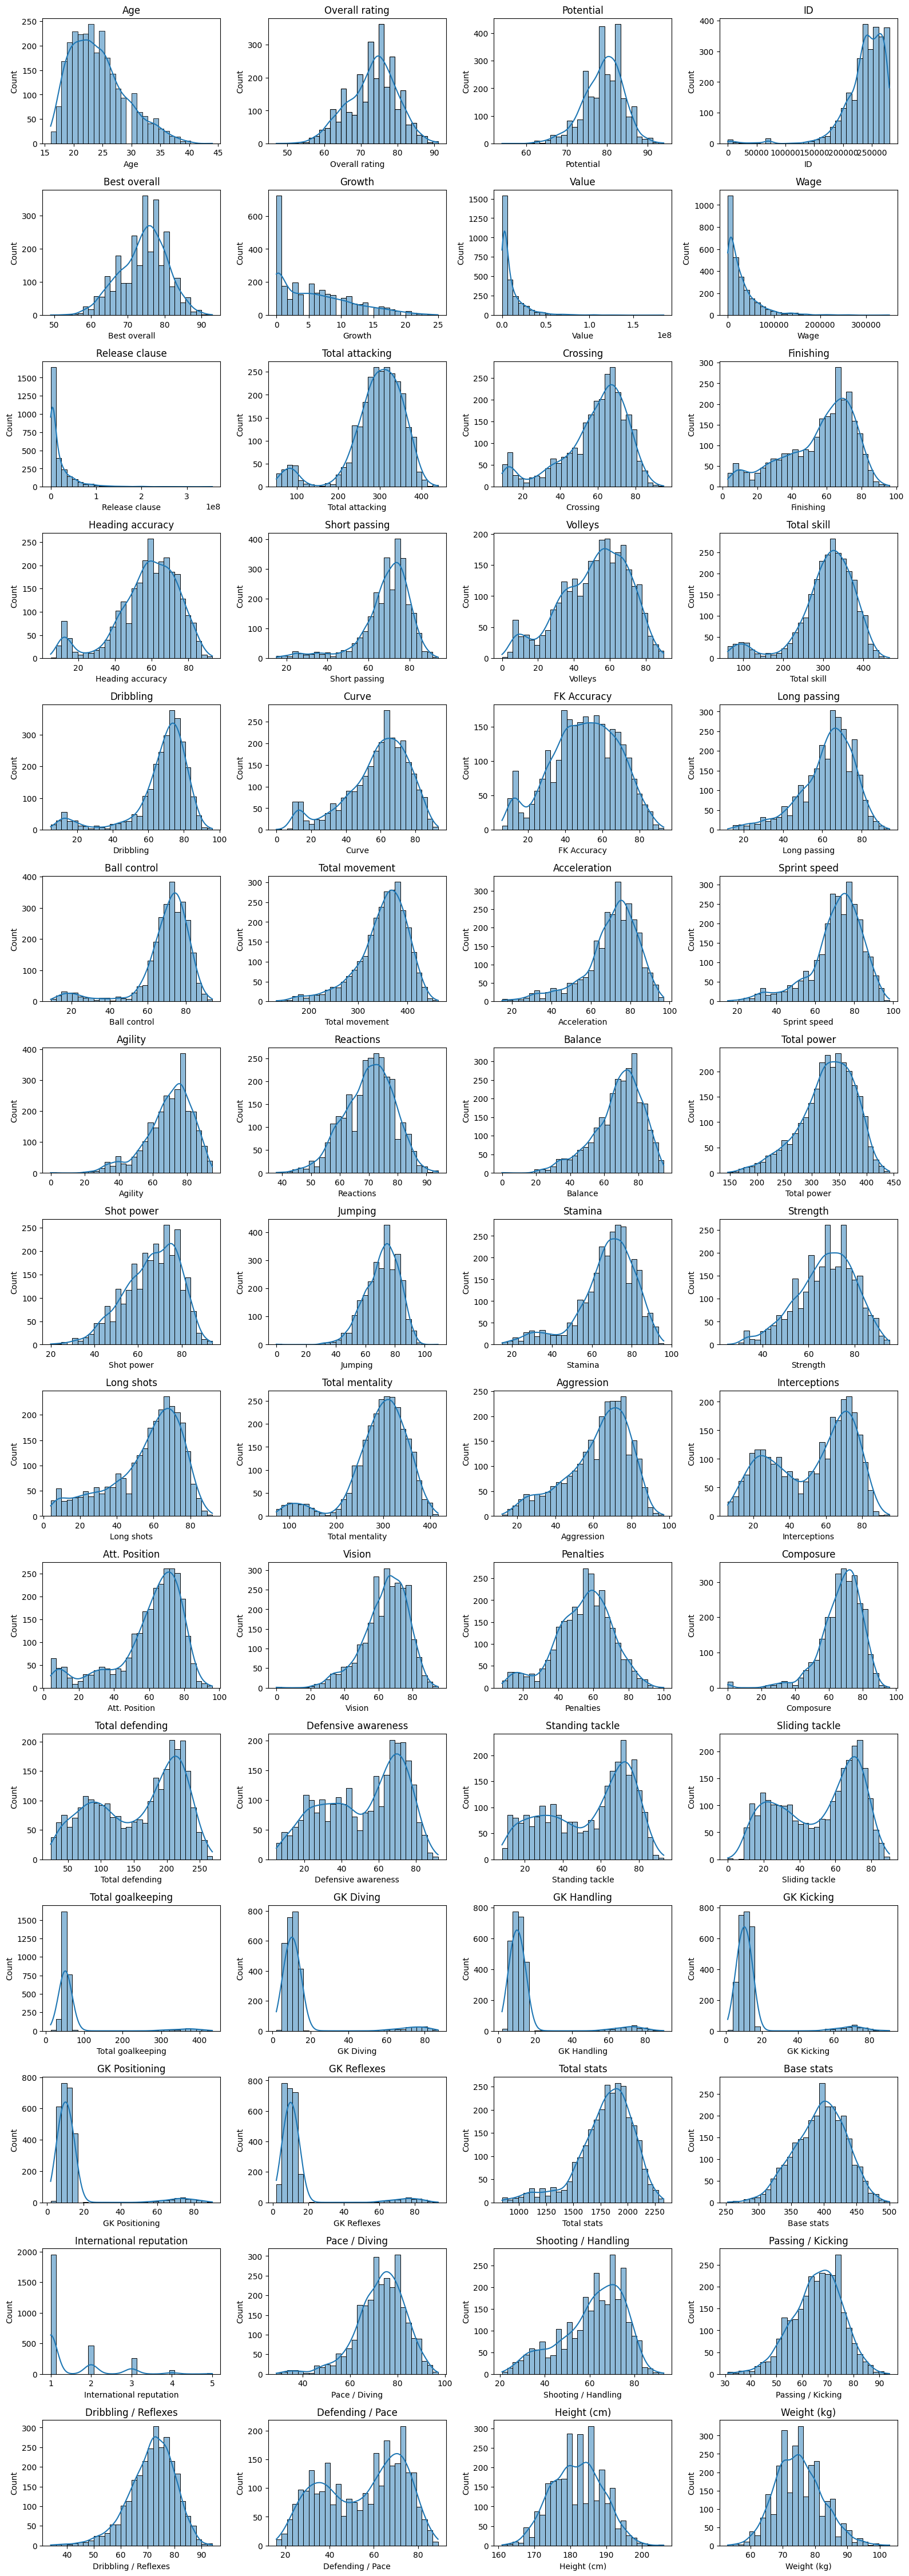

In [25]:
numeric_cols = df_clean.select_dtypes(include=['int64', 'float64'])

n_cols = 4
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

#subplot
plt.figure(figsize=(n_cols * 4, n_rows * 3))
for i, col in enumerate(numeric_cols.columns, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(df_clean[col], bins=30, kde=True)
    plt.title(col)
    plt.tight_layout()

### Cek Korelasi kolom numerik terhadap Value dengan Spearman

In [26]:
corr_spearman = numeric_cols.corr(method='spearman')

# Ambil korelasi fitur terhadap target 'Value'
corr_with_target = corr_spearman[['Value']].sort_values(by='Value', ascending=False)

# Tampilkan tabel korelasi
print(corr_with_target)

                             Value
Value                     1.000000
Best overall              0.901326
Overall rating            0.882598
Release clause            0.825798
Reactions                 0.805356
Wage                      0.789718
Base stats                0.744245
Composure                 0.676132
Short passing             0.663988
Potential                 0.660427
Ball control              0.657700
Dribbling / Reflexes      0.657635
Total stats               0.644813
Passing / Kicking         0.620809
Dribbling                 0.558403
Total mentality           0.548042
Vision                    0.544869
Total power               0.543845
Total attacking           0.538679
Long passing              0.524198
Total skill               0.522682
Stamina                   0.484573
Shot power                0.462859
Att. Position             0.461631
International reputation  0.447715
Shooting / Handling       0.436677
Crossing                  0.424413
Long shots          

In [27]:
df_clean["Best position"].unique()

array(['CAM', 'ST', 'LWB', 'CB', 'CM', 'RM', 'CDM', 'LM', 'RB', 'RWB',
       'LB', 'LW', 'GK', 'CF', 'RW'], dtype=object)

## Data Pre-Processing
Pada bagian data pre-processing, data akan disiapkan untuk pengolahan Machine Learning demi mendapatkan valuasi pemain. Namun perlu diingat, bahwa valuasi pemain sepak bola untuk tiap posisinya akan berbeda-beda. Maka dari itu, kolom fitur akan berfokus untuk masing-masing posisi, dilihat dari poisi kolom `Best position`. Maka dari itu, pada bagian pertama ini akan berfokus ke **CAM atau Central Attacking Midfielder**

1. Define X dan y sebagai kolom fitur dan Target
2. Mencari kolom Multico, jika ada Kolom dapat di drop
3. Splitting
4. Encoding data yang kategorikal
5. Scaling

### 1. Define X dan y khusus Attacking Midfielder
Menentukan nilai X dengan catatan:
- drop kolom Name dan Id karena hal tersebut adalah nilai intuk identifikasi dan tidak digunakan dalam Machine Learning.
- `Total attacking` adalah hasil dari `Crossing`+`Finishing`+`Heading accuracy`+`Short passing`+`Volleys`. Maka kolom penjumlahnya tidak perlu dimasukan lagi
- `Total skill`	adalah hasil dari `Dribbling`+`Curve`+`FK Accuracy`+`Long passing`+`Ball control`. Maka kolom penjumlahnya tidak perlu dimasukan lagi
- `Total movement`	adalah hasil dari `Acceleration`+`Sprint speed`+`Agility`+`Reactions`+`Balance`. Maka kolom penjumlahnya tidak perlu dimasukan lagi
- `Total power`	adalah hasil dari `Shot power`+`Jumping`+`Stamina Strength`+`Long shots`. Maka kolom penjumlahnya tidak perlu dimasukan lagi
- `Total mentality`	adalah hasil dari `Aggression`+`Interceptions`+`Att. Position`+`Vision`+`Penalties`+`Composure`. Maka kolom penjumlahnya tidak perlu dimasukan lagi
- `Total defending`	adalah hasil dari `Defensive awareness`+`Standing tackle`+`Sliding tackle`. Maka kolom penjumlahnya tidak perlu dimasukan lagi
- `Total goalkeeping` adalah hasil dari `GK Diving`+`GK Handling`+`GK Kicking`+`GK Positioning`+`GK Reflexes`. Maka kolom penjumlahnya tidak perlu dimasukan lagi
- Untuk bagian dari `Total stats`, tidak perlu dimasukan lagi karena ini merupakan hasil dari `Total attacking`, `Total skill`,`Total movement`,`Total power`,`Total mentality`,`Total defending`,`Total goalkeeping`. Hal ini didasari untuk tetap membuat Machine dengan fitur yang spesifik, namun tetap menjaga hal-hal umum.
- 

In [28]:
#Define X dan y
df_CAM =df_clean[df_clean['Best position'] == 'CAM']
X = df_CAM.drop(columns=['Value',
                         'name','ID','Best position', 
                         "Crossing",
                         "Finishing",
                         'Heading accuracy',
                         'Short passing',
                         'Volleys',
                         'Dribbling',
                         'Curve',
                         'FK Accuracy',
                         'Long passing',
                         'Ball control',
                         'Acceleration',
                         'Sprint speed',
                         'Agility',
                         'Reactions',
                         'Balance',
                         'Shot power',
                         'Jumping',
                         'Stamina',
                         'Strength',
                         'Long shots',
                         'Aggression',
                         'Interceptions',
                         'Att. Position',
                         'Vision',
                         'Penalties',
                         'Composure',
                         'Defensive awareness',
                         'Standing tackle',
                         'Sliding tackle',
                         'GK Diving',
                         'GK Handling',
                         'GK Kicking',
                         'GK Positioning',
                         'GK Reflexes',
                         'Total stats'])
y = df_CAM['Value']

In [29]:
X.select_dtypes(include=['object']).nunique()

foot               2
Team             268
contract_type      3
dtype: int64

In [30]:
X["Team"].unique()

array(['Querétaro', 'Ipswich Town', 'Real Madrid', 'Borussia Dortmund',
       'Arsenal', 'Chelsea', 'Sunderland', 'Bayer 04 Leverkusen',
       'Bologna', 'Real Sociedad', 'Manchester United', 'Inter Miami',
       'Las Palmas', 'Leeds United', 'Crystal Palace', 'Napoli', 'Getafe',
       'København', 'Manchester City', 'RB Leipzig', 'Liverpool',
       'Girona', 'Atlanta United', 'FC Bayern München', 'Lausanne Sport',
       'Blackburn Rovers', 'Al Ahli Jeddah', 'Paris Saint Germain',
       'Athletic Club', 'Brighton & Hove Albion', 'Olympique Lyonnais',
       'Nice', 'Rennes', 'Monaco', 'Real Betis', 'West Ham United',
       'Wolverhampton Wanderers', 'VfB Stuttgart', 'Villarreal',
       'TSG Hoffenheim', 'Atlético Madrid', 'FC Barcelona', 'Monza',
       'Juventus', 'Dinamo Zagreb', 'Milan', 'Aston Villa',
       'Borussia Mönchengladbach', 'Genk', 'AFC Bournemouth',
       'Sporting CP', 'Frosinone', 'Newcastle United', 'Roma',
       'Tottenham Hotspur', 'Nottingham Forest', 

### 2. Encoding

In [31]:
# Misal X adalah DataFrame asli Anda

# List semua tim sesuai urutan Anda
teams = ['Querétaro', 'Ipswich Town', 'Real Madrid', 'Borussia Dortmund', 'Arsenal', 'Chelsea', 'Sunderland', 'Bayer 04 Leverkusen', 'Bologna', 'Real Sociedad', 'Manchester United', 'Inter Miami', 'Las Palmas', 'Leeds United', 'Crystal Palace', 'Napoli', 'Getafe', 'København', 'Manchester City', 'RB Leipzig', 'Liverpool', 'Girona', 'Atlanta United', 'FC Bayern München', 'Lausanne Sport', 'Blackburn Rovers', 'Al Ahli Jeddah', 'Paris Saint Germain', 'Athletic Club', 'Brighton & Hove Albion', 'Olympique Lyonnais', 'Nice', 'Rennes', 'Monaco', 'Real Betis', 'West Ham United', 'Wolverhampton Wanderers', 'VfB Stuttgart', 'Villarreal', 'TSG Hoffenheim', 'Atlético Madrid', 'FC Barcelona', 'Monza', 'Juventus', 'Dinamo Zagreb', 'Milan', 'Aston Villa', 'Borussia Mönchengladbach', 'Genk', 'AFC Bournemouth', 'Sporting CP', 'Frosinone', 'Newcastle United', 'Roma', 'Tottenham Hotspur', 'Nottingham Forest', 'Nordsjælland', 'Leicester City', 'Burnley', 'Nürnberg', 'Dallas', 'Torino', 'Ferencváros', 'FC Köln', 'Al Ittihad', 'Fenerbahçe', 'Sassuolo', 'Motherwell', 'Clermont', 'VfL Wolfsburg', 'Porto', 'Feyenoord', 'Salzburg', 'River Plate', 'Columbus Crew', 'Mexico', 'Hull City', 'Shakhtar Donetsk', 'Boca Juniors', 'Eintracht Frankfurt', 'Lazio', 'PSV', 'Valencia', 'Rosenborg', 'Gent', 'Strasbourg', 'Atalanta', 'Rayo Vallecano', 'Sporting Braga', 'Sparta Rotterdam', 'Vissel Kobe', 'Almería', 'Parma', 'Plymouth Argyle', 'Watford', 'Beşiktaş', 'FCSB', 'Birmingham City', 'Elversberg', 'Estoril', 'Rangers', 'Inter', 'LOSC Lille', 'Venezia', 'LA Galaxy', 'Stade de Reims ', 'Blackpool', 'Galatasaray', 'Ajax', 'İstanbul Başakşehir', 'Seoul', 'Croatia', 'Empoli', 'Bristol Rovers', 'Ulm', 'Norwich City', 'Toulouse', 'Real Valladolid', 'New Zealand', 'Metz', 'Udinese', 'Fulham', 'Al Hilal', 'Sheffield United', 'Lens', 'Brescia', 'Famalicão', 'Brentford', 'Portsmouth', 'Huracán', 'Gil Vicente', 'PAOK', 'SC Heerenveen', 'Luton Town', 'América', 'Coventry City', 'Derby County', 'Olympique de Marseille', 'Godoy Cruz', 'Vitesse', 'Cádiz', 'Celtic', 'Osasuna', 'Hertha BSC', 'Rapid Bucuresti', 'Al Nassr', 'Racing Club', "Kuban' Krasnodar", 'Häcken', 'Middlesbrough', 'New York City', 'Malmö FF', 'Karlsruher SC', 'Antwerp', 'Seattle Sounders', 'Portimonense', 'Slavia Praha', 'FC Utrecht', 'Benfica', 'Queens Park Rangers', 'Werder Bremen', 'Al Taawon', 'Sampdoria', 'Basel', 'Hajduk Split', 'Union Saint-Gilloise', 'Southampton', 'Anderlecht', 'Nashville SC', 'Morocco', 'Cincinnati', 'FSV Mainz 05', 'FC Groningen', 'Hyderabad', 'Coritiba', 'Brazil', 'Iceland', 'Sint-Truiden', 'Argentinos Juniors', 'Millwall', 'Port Vale', 'AZ Alkmaar', 'Cagliari', 'Lorient', 'Poland', 'Schalke 04', 'Huddersfield Town', 'Como', 'Midtjylland', 'Bodø / Glimt', 'Sparta Praha', 'SC Freiburg', 'Celta de Vigo', 'Ukraine', 'Vizela', 'Saint-Étienne', 'Atlético Mineiro', 'Bordeaux', 'Fiorentina', 'Hungary', 'Everton', 'Vasco da Gama', 'Arouca', 'Independiente', 'Vélez Sarsfield', 'Sandhausen', 'Salernitana', 'Real Oviedo', 'DSC Arminia Bielefeld', 'Austria Lustenau', 'Western United', 'Bristol City', 'Stade Brestois 29', 'Ghana', 'Wehen Wiesbaden', 'Heidenheim', 'Reggiana', 'Nantes', 'Racing Ferrol', 'Reading', 'Hellas Verona', 'Hatayspor', 'Orlando City', 'Troyes', 'Dynamo Kyiv', 'Shrewsbury Town', 'Stevenage', 'Al Ain', 'Angers SCO', 'Viktoria Plzeň', 'Rosario Central', 'Club Brugge', 'FC Augsburg', 'Osnabrück', 'Samsunspor', 'Hamburger SV', 'Cardiff City', 'Auxerre', 'Minnesota United', 'Montpellier', 'RWDM', 'Fluminense', 'SD Eibar', 'Fortuna Sittard', 'PEC Zwolle', 'Molde', 'Dijon', 'New York RB', 'Hebei', 'Internacional', 'Wolfsberger AC', 'Radomiak Radom', 'Cittadella', 'Elche', 'Sivasspor', 'Lanús', 'FC Andorra', 'Villarreal II', 'Sevilla', 'Almere City', 'Exeter City', 'Grasshopper', 'LASK Linz', 'San Jose Earthquakes', 'Freiburg II', 'UCD', 'Unterhaching', 'Gimnasia La Plata']

# Buat mapping manual untuk 'Team'
team_mapping = {team: idx+1 for idx, team in enumerate(teams)}

# Terapkan mapping ke kolom 'Team'
X['Team_encoded'] = X['Team'].map(team_mapping)

# Jika ada nilai yang tidak ada di mapping, isi dengan 0
X['Team_encoded'] = X['Team_encoded'].fillna(0).astype(int)

# Lakukan one-hot encoding pada kolom 'foot' dan 'contract_type'
X_encoded = pd.get_dummies(X, columns=['foot', 'contract_type'], drop_first=True)

# Pastikan semua kolom numerik bertipe int64
for col in X_encoded.columns:
    if pd.api.types.is_numeric_dtype(X_encoded[col]):
        X_encoded[col] = X_encoded[col].astype("int64")

X_encoded= X_encoded.drop(columns="Team")
X_encoded.head()


,Age,Overall rating,Potential,Best overall,Growth,Wage,Release clause,Total attacking,Total skill,Total movement,Total power,Total mentality,Total defending,Total goalkeeping,Base stats,International reputation,Pace / Diving,Shooting / Handling,Passing / Kicking,Dribbling / Reflexes,Defending / Pace,Height (cm),Weight (kg),Team_encoded,foot_Right,contract_type_Full Contract,contract_type_Loan
0,34,78,78,77,0,45000,0,367,430,313,314,319,78,54,377,3,49,72,83,84,28,182,76,1,1,1,0
1,19,65,81,67,16,3000,4500000,266,304,366,272,264,140,39,351,1,72,54,61,70,44,174,65,2,0,1,0
2,23,82,86,84,4,145000,92400000,328,379,429,332,294,84,51,409,1,85,74,78,85,31,170,68,3,1,1,0
3,17,62,80,65,18,900,2300000,257,292,356,267,263,161,48,353,1,72,50,59,66,52,178,72,4,1,1,0
4,18,77,88,79,11,41000,49500000,340,403,380,308,316,155,58,405,1,72,70,80,81,52,175,70,3,0,1,0


### 3. Mencari kolom multico dengan VIF

In [32]:
def vif_calc(X):
    vif = pd.DataFrame()
    vif['Kolom'] = X_encoded.columns
    vif['VIF'] = [variance_inflation_factor(X,i) for i in range(len(X.columns))]
    vif['Acc'] = np.where(vif['VIF'] > 10, 'No', 'Yes')
    return vif

In [33]:
X_encoded = X_encoded.select_dtypes(include=['int64', 'float64'])
vif_calc(X_encoded.select_dtypes(include=['int64', 'float64'])).sort_values(by="VIF",ascending=False)


,Kolom,VIF,Acc
2,Potential,64780.737305,No
1,Overall rating,63813.998143,No
14,Base stats,37874.526586,No
3,Best overall,11209.378887,No
19,Dribbling / Reflexes,5285.056029,No
18,Passing / Kicking,4241.904381,No
10,Total power,2402.063083,No
16,Pace / Diving,1882.220909,No
8,Total skill,1782.824046,No
9,Total movement,1469.770562,No


Terlihat dari hasil VIF terdapat infinity, ini mengharuskan mendrop beberapa kolom tersebut. Akan tetapi, cara mendropnya harus satu per satu, karena setelah mendrop, pasti akan mempengaruhi nilai

In [34]:
def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data["feature"] = df.columns
    vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif_data

X_numeric = X_encoded.select_dtypes(include=['int64', 'float64']).copy()

while True:
    vif = calculate_vif(X_numeric)
    max_vif = vif["VIF"].max()
    if max_vif <= 10:
        break
    feature_to_drop = vif.sort_values(by="VIF", ascending=False).iloc[0]["feature"]
    print(f"Dropping feature '{feature_to_drop}' with VIF = {max_vif}")
    X_numeric = X_numeric.drop(columns=[feature_to_drop])

print("Remaining features with VIF <= 10:")
print(X_numeric.columns)

Dropping feature 'Potential' with VIF = 64780.73730546344
Dropping feature 'Base stats' with VIF = 37597.31133433186
Dropping feature 'Best overall' with VIF = 11161.795416221645
Dropping feature 'Overall rating' with VIF = 4674.496529376862
Dropping feature 'Passing / Kicking' with VIF = 1503.1338803450315
Dropping feature 'Total movement' with VIF = 1424.689076684074
Dropping feature 'Defending / Pace' with VIF = 1042.198417421232
Dropping feature 'Height (cm)' with VIF = 966.5634919098017
Dropping feature 'Dribbling / Reflexes' with VIF = 819.6724069664482
Dropping feature 'Total attacking' with VIF = 648.6341324198795
Dropping feature 'Shooting / Handling' with VIF = 512.4843139178236
Dropping feature 'Total mentality' with VIF = 447.5666725485049
Dropping feature 'Total skill' with VIF = 302.42420989098264
Dropping feature 'Total power' with VIF = 199.00693049147378
Dropping feature 'Weight (kg)' with VIF = 129.7725117346484
Dropping feature 'Age' with VIF = 78.27842894540787
Drop

Setelah melihat hasil dari pengecekan Multikolinearitas, ternyata terdapat banyak kolom yang dirasa penting untuk memvaluasi seorang CAM (gelandang serang) ternyata dihilangkan. Maka dari itu, kolom-kolom tersebut akan dikembalikan untuk menjadi bagian fitur dari pembuatan model prediksi Value (target). Hal ini menjadikan fitur-fitur akan tetap menggunakan variabel `X_encoded` (Variabel X yang sudah di encode)

In [35]:
X_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 541 entries, 0 to 3109
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Age                          541 non-null    int64
 1   Overall rating               541 non-null    int64
 2   Potential                    541 non-null    int64
 3   Best overall                 541 non-null    int64
 4   Growth                       541 non-null    int64
 5   Wage                         541 non-null    int64
 6   Release clause               541 non-null    int64
 7   Total attacking              541 non-null    int64
 8   Total skill                  541 non-null    int64
 9   Total movement               541 non-null    int64
 10  Total power                  541 non-null    int64
 11  Total mentality              541 non-null    int64
 12  Total defending              541 non-null    int64
 13  Total goalkeeping            541 non-null    int64
 14

### 4. Splitting
Splitting dilakukan untuk membagi data antara data untuk latihan (train), data data untuk pengujian (test). Hal ini diharuskan agar pembuatan model tidak terdampak bocornya informasi saat melakukan pelatihan dan pengujian.

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

### 5. Scaling
Scaling proses mengubah skala atau rentang nilai fitur (variabel input) agar berada dalam rentang tertentu atau memiliki distribusi tertentu. Tujuannya adalah agar fitur-fitur dalam dataset memiliki skala yang sebanding sehingga model machine learning dapat belajar dengan lebih efektif dan cepat.

In [37]:
X_encoded.head(3)

,Age,Overall rating,Potential,Best overall,Growth,Wage,Release clause,Total attacking,Total skill,Total movement,Total power,Total mentality,Total defending,Total goalkeeping,Base stats,International reputation,Pace / Diving,Shooting / Handling,Passing / Kicking,Dribbling / Reflexes,Defending / Pace,Height (cm),Weight (kg),Team_encoded,foot_Right,contract_type_Full Contract,contract_type_Loan
0,34,78,78,77,0,45000,0,367,430,313,314,319,78,54,377,3,49,72,83,84,28,182,76,1,1,1,0
1,19,65,81,67,16,3000,4500000,266,304,366,272,264,140,39,351,1,72,54,61,70,44,174,65,2,0,1,0
2,23,82,86,84,4,145000,92400000,328,379,429,332,294,84,51,409,1,85,74,78,85,31,170,68,3,1,1,0


In [38]:
transformer = ColumnTransformer([
    ('robust', RobustScaler(), ['Age', 'Overall rating', 'Potential', 'Best overall', 'Growth', 'Wage', 'Release clause',
                  'Total attacking', 'Total skill', 'Total movement', 'Total power', 'Total mentality',
                  'Total defending', 'Total goalkeeping', 'Base stats', 'International reputation',
                  'Pace / Diving', 'Shooting / Handling', 'Passing / Kicking', 'Dribbling / Reflexes',
                  'Defending / Pace', 'Height (cm)', 'Weight (kg)'])
], remainder = 'passthrough')

## Modeling Data Untuk Intepretasi
Modeling ini dilakukan menggunakan Ordinary Least Squares (OLS). Diambil berdasarkan data sebelum Splitting dengan menambahkan nilai konstanta sebagai nilai intercept data. Maka yang digunakan adalah nilai `X_encoded` (fitur) dan `y`(target).

Perlu diingat, hasil VIF menandakan banyak kolom yang menyebabkan multikolinearitas antar kolom fitur. Maka dari itu, model linear ini hanya boleh digunakan untuk intepretasi awal saja, dan bukan digunakan sebagai model. Hal ini didasari karena model ini akan menjadi tidak akurat.

In [39]:
X_encoded = sm.add_constant(X_encoded)

In [40]:
# define model
model_CAM = sm.OLS(y, X_encoded)

# fitting
model_CAM = model_CAM.fit()

# summary
print(model_CAM.summary())

                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     344.7
Date:                Fri, 09 May 2025   Prob (F-statistic):          8.08e-309
Time:                        22:05:05   Log-Likelihood:                -9001.4
No. Observations:                 541   AIC:                         1.806e+04
Df Residuals:                     513   BIC:                         1.818e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

Model Regresi:
y = -3.552e+07  + -4.016e+05*Age + ... + 6.585e+06*contract_type_Loan

1. **Adj R-Square = 0.945** -> untuk model multiple.
    > Artinya model mampu menangkap variasi data sebesar 94.5% sisanya sebesar 5.5% dapat dijelaskan oleh feature lain di luar model.

2. **Prob F-Statistics (Uji Simultan)**
    - H0 : b1 = b2 = ... = bk = 0 (tidak ada feature yang berpengaruh terhadap target)
    - H1 : at least bk $\neq$ 0 (paling tidak ada satu feature yang berpengaruh terhadap target)
    - p-value = 8.08e-309 < 0.05
    - H0 ditolak, jadi paling tidak ada 1 feature yang berpengaruh.

3. **P > |t| (Uji Parsial)**
    - H0 : bk = 0
    - H1 : bk $\neq$ 0
    - Ho ditolak ketika p-value < 0.05
    - Kesimpulan: Variabel yang berpengaruh terhadap target yaitu `Age`, `Best overall`, `Release clause`, `International reputation`, dan `contract_type_Loan`. Sisanya tidak berpengaruh

4. **Coefficient Interpretation**
    - **Const** -> `p_value = 0.001`
        + model membutuhkan konstanta
    - **Numerik** -> `Age` =  -4.016e+05
        + Setiap penambahan 1 tahun umur, maka akan mengurangi value sebesar 4.016e+05
        + Semakin tinggi umur, value pemain semakin menurun.
    - **Numerik** -> `Best overall` = 6.948e+05
        + Setiap penambahan 1 poin Best overall, maka akan meningkatkan value sebesar 6.948e+05
        + Semakin tinggi best overall, value pemain semakin meningkat.
    - **Numerik** -> `Release clause` =  0.4160
        + Setiap penambahan 1 Euro Release Clause, maka akan meningkatkan value sebesar 0.4160
        + Semakin tinggi Release Clause, value pemain semakin meningkat.
    - **Numerik** -> `International reputation` = 1.936e+06
        + Setiap penambahan 1 poin International reputation, maka akan meningkatkan value sebesar 1.936e+06
    - **Kategorikal** -> `contract_type_Loan` = 3.901e+08, `contract_type_Full Contract` = 1.051e+05, `Free` menjadi Base
        + Setiap pemain dengan tipe kontrak Loan akan memiliki value lebih mahal dibandingkan properti pemain dengan tipe kontrak Free sebesar 3.901e+08
        + Setiap pemain dengan tipe kontrak Full Conntract akan memiliki value lebih mahal dibandingkan properti pemain dengan tipe kontrak Free sebesar 1.051e+05
        + Urutan harga properti berdasarkan daerah: Free < Full Contract < Loan

## Benchmarking Model untuk Prediksi
Diperlukan model sebagai barometer pengerjaan machine learning untuk memprediksi nilai Value. Model yang digunakan adalah:
1. Ridge
2. Decision Tree Regressor
3. KNN Regressor
4. Random Forest
5. XG Boost

In [41]:
### Define Model
ridge = Ridge()
dt_reg = DecisionTreeRegressor()
knn = KNeighborsRegressor()
random_forest = RandomForestRegressor(random_state=42)
xgboost = XGBRegressor(random_state=42, objective='reg:squarederror')

In [42]:
### Benchmarking Model
model = [ridge, dt_reg, knn, random_forest, xgboost]

# metrics
list_scorer = ['neg_root_mean_squared_error', 'neg_mean_absolute_percentage_error']

# list kosong
list_mean_rmse = []
list_std_rmse = []

list_mean_mape = []
list_std_mape = []

list_all = []

# looping model dengan pipeline dan cross validation
for i in model:
    # pipeline
    pipe_prep_model = Pipeline([
        ('preprocessing', transformer),
        ('model', i)
        ])
    crossval = cross_validate(pipe_prep_model, 
                              X_train,
                              y_train,
                              cv = 5,
                              scoring = list_scorer
                              )
    list_all.append(crossval)
    list_mean_rmse.append(crossval['test_neg_root_mean_squared_error'].mean())
    list_std_rmse.append(crossval['test_neg_root_mean_squared_error'].std())
    list_mean_mape.append(crossval['test_neg_mean_absolute_percentage_error'].mean())
    list_std_mape.append(crossval['test_neg_mean_absolute_percentage_error'].std())

df_model_cv = pd.DataFrame()
df_model_cv['model'] = model
df_model_cv['mean_rmse'] = list_mean_rmse
df_model_cv['std_rmse'] = list_std_rmse
df_model_cv['mean_mape'] = list_mean_mape
df_model_cv['std mape'] = list_std_mape

df_model_cv['mean_rmse'] = np.abs(df_model_cv['mean_rmse'])
df_model_cv['std_rmse'] = np.abs(df_model_cv['std_rmse'])
df_model_cv['mean_mape'] = np.abs(df_model_cv['mean_mape'])
df_model_cv['std mape'] = np.abs(df_model_cv['std mape'])

df_model_cv.sort_values(by="mean_mape", ascending=True)

,model,mean_rmse,std_rmse,mean_mape,std mape
4,"XGBRegressor(base_score=None, booster=None, ca...",3.749037e+06,9.593010e+05,2.740897e+20,3.006912e+20
0,Ridge(),4.353309e+06,1.363124e+06,3.718955e+20,3.132563e+20
3,RandomForestRegressor(random_state=42),3.798575e+06,1.107117e+06,4.786634e+20,3.318779e+20
2,KNeighborsRegressor(),8.711133e+06,1.189940e+06,6.804667e+20,3.682105e+20
1,DecisionTreeRegressor(),6.013501e+06,2.666708e+06,7.114508e+20,6.926425e+20


In [43]:
df_clean[df_clean["Value"]==0].head(10)

,name,Age,Overall rating,Potential,ID,foot,Best overall,Best position,Growth,Value,Wage,Release clause,Total attacking,Crossing,Finishing,Heading accuracy,Short passing,Volleys,Total skill,Dribbling,Curve,FK Accuracy,Long passing,Ball control,Total movement,Acceleration,Sprint speed,Agility,Reactions,Balance,Total power,Shot power,Jumping,Stamina,Strength,Long shots,Total mentality,Aggression,Interceptions,Att. Position,Vision,Penalties,Composure,Total defending,Defensive awareness,Standing tackle,Sliding tackle,Total goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total stats,Base stats,International reputation,Pace / Diving,Shooting / Handling,Passing / Kicking,Dribbling / Reflexes,Defending / Pace,Team,contract_type,Height (cm),Weight (kg)
184,I. Reyes,23,74,81,252008,Right,76,CDM,7,0.0,0.0,0.0,319,60,59,69,72,59,348,72,67,62,74,73,395,81,85,77,73,79,375,76,82,76,74,67,354,68,74,67,70,75,78,225,78,74,73,45,8,9,11,12,5,2061,440,1,83,65,69,74,75,Mexico,Free Transfer,179,73
263,M. Ruiz,22,75,82,244973,Right,77,CM,7,0.0,0.0,0.0,324,64,60,60,80,60,365,73,69,68,77,77,370,74,74,81,69,72,360,72,72,82,64,70,345,58,75,70,77,65,68,199,70,65,64,49,14,14,6,8,7,2012,425,1,74,65,75,75,68,Mexico,Free Transfer,180,68
291,C. Huerta,22,75,81,246289,Right,76,RM,6,0.0,0.0,0.0,354,73,71,66,71,73,333,84,51,53,70,75,385,83,83,88,56,75,354,66,80,70,70,68,283,51,24,70,70,68,57,161,40,61,60,48,7,12,6,11,12,1918,415,1,83,69,69,79,48,Mexico,Free Transfer,171,67
308,J. Quiñones,26,78,79,234579,Right,79,ST,1,0.0,0.0,0.0,359,58,81,76,75,69,345,80,51,66,70,78,396,88,88,83,69,68,422,80,95,88,89,70,315,60,21,75,81,78,65,99,25,46,28,51,8,12,11,8,12,1987,433,1,88,78,70,78,36,Mexico,Free Transfer,177,78
341,E. Sánchez,23,78,83,235537,Right,80,CM,5,0.0,0.0,0.0,339,68,72,63,82,54,361,72,70,65,80,74,372,73,74,80,70,75,390,83,74,82,69,82,369,68,80,75,81,65,72,223,80,73,70,55,12,12,12,12,7,2109,446,1,74,75,77,73,75,Mexico,Free Transfer,167,71
425,L. Chávez,27,79,79,222382,Left,79,CM,0,0.0,0.0,0.0,331,74,64,48,80,65,398,79,76,84,78,81,383,83,83,71,75,71,386,85,69,88,64,80,362,60,70,76,86,70,72,221,76,75,70,52,7,10,14,9,12,2133,453,1,83,72,80,78,71,Mexico,Free Transfer,178,73
449,H. Martín,30,79,79,224151,Right,79,ST,0,0.0,0.0,0.0,360,59,82,84,70,65,325,72,64,51,60,78,389,76,78,78,74,83,412,79,95,80,93,65,337,75,42,82,63,75,78,88,45,21,22,51,9,10,11,9,12,1962,418,1,77,77,64,75,39,Mexico,Free Transfer,177,83
491,A. Afif,26,77,77,234051,Right,77,LM,0,0.0,0.0,0.0,342,71,78,48,74,71,366,79,77,63,70,77,397,87,87,81,70,72,326,70,64,72,51,69,285,37,27,76,69,76,78,92,28,36,28,44,7,14,8,5,10,1852,396,1,87,74,71,78,32,Qatar,Free Transfer,176,70
540,Pepe,40,81,81,120533,Right,81,CB,0,0.0,12000.0,0.0,269,46,46,81,73,23,284,58,44,47,75,60,341,73,77,62,81,48,378,63,91,82,86,56,318,94,79,40,48,57,80,245,83,82,80,47,8,15,5,9,10,1882,415,4,75,51,60,61,81,Porto,Full Contract,188,79
564,S. Córdova,26,76,79,242118,Left,78,CAM,3,0.0,0.0,0.0,322,64,70,48,78,62,377,81,70,71,75,80,389,75,74,82,74,84,370,80,64,83,61,82,337,64,61,69,71,72,70,180,55,65,60,45,7,8,14,8,8,2020,427,1,74,74,73,80,59,Mexico,Free Transfer,174,66


Terlihat nilai error sangat buruk, ternyata hal ini bisa disebabkan karena pada data latih maupun tes milik Target mempunyai nilai 0. MAPE menghitung persentase kesalahan absolut relatif terhadap nilai aktual. Jika nilai aktual sangat kecil atau nol, pembagian oleh nilai tersebut menyebabkan nilai MAPE menjadi sangat besar atau tak terhingga. Solusinya adalah membuat skor dengan Symmetric Mean Absolute Percentage Error atau SMAPE.

Karena denominator adalah rata-rata absolut dari nilai aktual dan prediksi, SMAPE mengurangi masalah pembagian dengan nol yang sering terjadi pada MAPE. Untuk itu, SMAPE cocok untuk data dengan nilai nol atau sangat kecil karena menghindari pembagian dengan nol secara langsung.

SMAPE didefinisikan sebagai rata-rata dari rasio absolut selisih antara nilai aktual dan prediksi terhadap rata-rata absolut nilai aktual dan prediksi, dikalikan 100%


In [44]:
from sklearn.metrics import make_scorer

#Buat Fungsi SMAPE Kustom
def smape(y_true, y_pred):
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2
    diff = np.abs(y_true - y_pred) / denominator
    diff[denominator == 0] = 0  # menghindari NaN saat y_true & y_pred = 0
    return np.mean(diff) * 100

#Buat Scorer-nya
smape_scorer = make_scorer(smape, greater_is_better=False)

#Tambahkan ke Daftar Scorer
list_scorer = ['neg_root_mean_squared_error', 'neg_mean_absolute_percentage_error', smape_scorer]

#Evaluasi SMAPE Terpisah Tiap Model
list_mean_smape = []
list_std_smape = []

for i in model:
    pipe_prep_model = Pipeline([
        ('preprocessing', transformer),
        ('model', i)
    ])
    smape_scores = cross_val_score(pipe_prep_model, X_train, y_train, 
                                   cv=5, scoring=smape_scorer)
    list_mean_smape.append(-np.mean(smape_scores))
    list_std_smape.append(np.std(smape_scores))

#Tambahkan ke DataFrame Akhir
df_model_cv['mean_smape'] = list_mean_smape
df_model_cv['std_smape'] = list_std_smape

In [45]:
df_model_cv.sort_values(by='mean_smape', ascending=True, inplace=True)
print(df_model_cv[['model', 'mean_smape', 'std_smape']])

                                               model  mean_smape  std_smape
3             RandomForestRegressor(random_state=42)   18.078629   2.482414
4  XGBRegressor(base_score=None, booster=None, ca...   21.252525   2.379042
1                            DecisionTreeRegressor()   24.492022   3.739391
0                                            Ridge()   56.508799   2.030072
2                              KNeighborsRegressor()   59.562342   2.690772


Dari hasil SMAPE, yang diambil adalah nilai mean SMAPE terkecil. Random Forest Regressor menjadi model yang dianggap terbaik dalam memprediksi nilai `Value`

## Hyperparameter Tuning
Berdasarkan benchmarking, model yang terpilih untuk memprediksi adalah Random Forest Regressor. Untuk itu

In [46]:
pipe_rf = Pipeline([
    ('preprocessing', transformer),
    ('model', RandomForestRegressor(random_state=42))
])

# Parameter grid
param_grid = {
    'model__n_estimators': [100, 300, 500, 700, 1000],  # lebih banyak pohon
    'model__max_depth': [None, 10, 20, 30, 50, 70],     # lebih dalam
    'model__min_samples_split': [2, 5, 10, 15],         # agar pohon tidak terlalu overfit
    'model__min_samples_leaf': [1, 2, 4, 6],            # kontrol overfitting
    'model__max_features': ['auto', 'sqrt', 'log2', 0.8] # variasi jumlah fitur
}

# Grid search
grid_search = GridSearchCV(
    pipe_rf,
    param_grid,
    cv=5,
    scoring=smape_scorer,  # bisa ganti ke custom scorer SMAPE jika ingin
    n_jobs=-1,
    verbose=1
)

# Fit model
grid_search.fit(X_train, y_train)

# Output hasil terbaik
print("Best Parameters:", grid_search.best_params_)
print("Best SMAPE Score:", -grid_search.best_score_)

Fitting 5 folds for each of 1920 candidates, totalling 9600 fits
Best Parameters: {'model__max_depth': None, 'model__max_features': 0.8, 'model__min_samples_leaf': 2, 'model__min_samples_split': 2, 'model__n_estimators': 700}
Best SMAPE Score: 17.70594560945264


Cek ulang sekali lagi apa bisa lebih diturunkan nilai errornya.

In [47]:
pipe_rf = Pipeline([
    ('preprocessing', transformer),
    ('model', RandomForestRegressor(random_state=42))
])

# Parameter grid
param_grid = {
    'model__n_estimators': [600, 650, 700, 750, 800],  # lebih banyak pohon
    'model__max_depth': [None, 10],     # lebih dalam
    'model__min_samples_split': [2, 5, 10, 15],         # agar pohon tidak terlalu overfit
    'model__min_samples_leaf': [1, 2, 4, 6],            # kontrol overfitting
    'model__max_features': ['auto', 'sqrt', 'log2', 0.8] # variasi jumlah fitur
}

# Grid search
grid_search = GridSearchCV(
    pipe_rf,
    param_grid,
    cv=5,
    scoring=smape_scorer,  # bisa ganti ke custom scorer SMAPE jika ingin
    n_jobs=-1,
    verbose=1
)

# Fit model
grid_search.fit(X_train, y_train)

# Output hasil terbaik
print("Best Parameters:", grid_search.best_params_)
print("Best SMAPE Score:", -grid_search.best_score_)

Fitting 5 folds for each of 640 candidates, totalling 3200 fits
Best Parameters: {'model__max_depth': None, 'model__max_features': 0.8, 'model__min_samples_leaf': 2, 'model__min_samples_split': 2, 'model__n_estimators': 750}
Best SMAPE Score: 17.697081166255753


Terlihat dari hasil di atas, bahwa Random Forest Regressor terbaik adalah dengan:
- 'model__max_depth': tidak dibatasi
- 'model__max_features': 0.8
- 'model__min_samples_leaf': 2
- 'model__min_samples_split': 2
- 'model__n_estimators': 750

## Prediksi Pada Data Test Sekaligus Membandingkan dengan Model Sebelum Tuning

In [48]:
# Before Tuning
pipe_prep_model = Pipeline([
    ('preprocessing', transformer),
    ('modeling', RandomForestRegressor(random_state=42))
])
# Fit pada data mentah (X_train)
pipe_prep_model.fit(X_train, y_train)

# Predict pada data mentah (X_test)
y_pred_before = pipe_prep_model.predict(X_test)

# Hitung SMAPE menggunakan fungsi smape
Smape_before = smape(y_test, y_pred_before)
Smape_before

np.float64(18.510660984566034)

In [49]:
#After Tuning
best_model = grid_search.best_estimator_

# fitting
best_model.fit(X_train, y_train)

# predict
y_pred_best = best_model.predict(X_test)

# mape
Smape_after=smape(y_test, y_pred_best)
Smape_after

np.float64(18.42866535256671)

- Model sebelum tuning, memiliki error 18.5%
- Model setelah tuning, memiliki error 18.4%, turun sekitar 0.1% dari model sebelum tuning

Ini juga bisa diartikan sebagai model setelah tuning dapat memprediksi nilai valuasi (`Value`) pemain Gelandang Serang (CAM) sebesar 81.6% dengan 18.4%-nya adalah margin error prediksi.

In [50]:
df_compare = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted Before Tuning': y_pred_before,
    'Predicted After Tuning': y_pred_best
})

# Menambahkan kolom selisih prediksi
df_compare['Error Before'] = abs(df_compare['Actual'] - df_compare['Predicted Before Tuning'])
df_compare['Error After'] = abs(df_compare['Actual'] - df_compare['Predicted After Tuning'])

df_compare.sample(10)

,Actual,Predicted Before Tuning,Predicted After Tuning,Error Before,Error After
107,1700000.0,1447250.0,1.461614e+06,252750.0,2.383858e+05
72,3600000.0,3435000.0,3.450503e+06,165000.0,1.494970e+05
54,60000.0,427500.0,4.203192e+05,367500.0,3.603192e+05
32,6000000.0,6839000.0,6.693457e+06,839000.0,6.934571e+05
29,2500000.0,3138250.0,3.062025e+06,638250.0,5.620246e+05
60,4900000.0,5754000.0,5.736474e+06,854000.0,8.364741e+05
8,0.0,656000.0,5.992786e+05,656000.0,5.992786e+05
99,7000000.0,7405000.0,7.120831e+06,405000.0,1.208311e+05
10,128500000.0,100580000.0,1.016876e+08,27920000.0,2.681240e+07
7,4100000.0,3628000.0,3.297292e+06,472000.0,8.027084e+05


## Intepretasi Model Menggunakan Shap

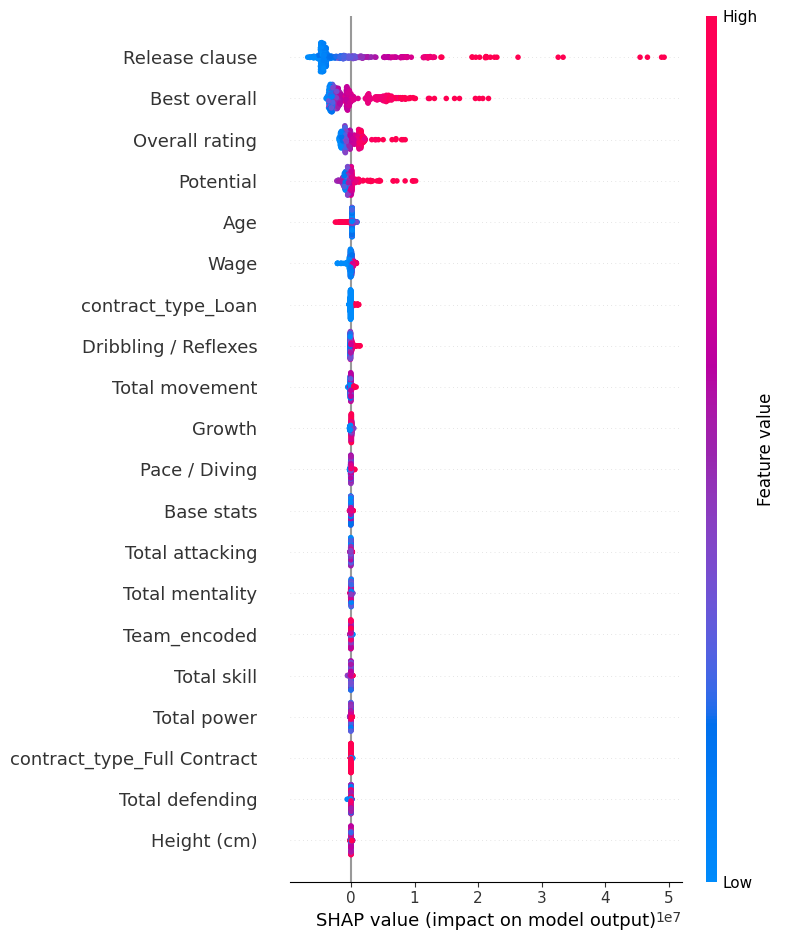

In [51]:
# Pastikan model sudah fit
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Ambil model saja dari pipeline
rf_model = best_model.named_steps['model']
X_train_transformed = best_model.named_steps['preprocessing'].transform(X_train)

# SHAP explainer
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_train_transformed)

# Summary plot
shap.summary_plot(shap_values, X_train_transformed, feature_names=X_train.columns)

Insight:
1. `release clause`: Semakin tinggi release clause, semakin tinggi pula valuasi pemainnya
2. `best overall`: Semakin bagus penilaian overall dari statistik pemain, semakin tinggi pula valuasi pemainnya
3. `overall rating`: Semakin tinggi rating pemain, maka semakin tinggi pula valuasi pemainnya
4. `potential`: Semakin bagus penilaian potensi pemain, maka semakin tinggi juga valuasi pemainnya
5. `Age`: Semakin tua seorang pemain, maka valuasinya akan menurun
6. `wage`: Semakin mahal gaji seorang pemain, maka semakin tinggi nilai valuasi pemainny 

Top 5 fitur yang paling berpengaruh terhadap valuasi pemain gelandang serang (CAM) dilihat berdasarkan Shap:
1. `release clause`
2. `best overall`
3. `overall rating`
4. `potential`
5. `Age`

Semua fitur yang paling berpengaruh ini memang menjadi masuk akal untuk menilai valuasi pemain sepak bola, terlebih posisi gelandang serang.


# Kesimpulan
Berdasarkan hasil, model Machine Learning yang digunakan adalah model **Random Forest Regressor** dengan tuning:
- 'model__max_depth': tidak dibatasi
- 'model__max_features': 0.8
- 'model__min_samples_leaf': 2
- 'model__min_samples_split': 2
- 'model__n_estimators': 750

Hasil error yang dapat ditekan setelah model melewati hyperparameter tuning adalah sebesar 18.4%. Inilah yang menjadi limitasi dari mesin prediksi valuasi.

Ini berarti setiap tim sepak bola yang ingin menggunakan Machine Learning ini sebagai acuan pembelian gelandang serang, harus menyiapkan uang setidaknya 18.4% lebih banyak dari hasil valuasi model ini.

Misal:
Machine learning menilai valuasi pemain 'X' sebesar 1.000.000 euro, maka tim harus bersiap mengeluarkan uang setidaknya sebesar 1.184.000 jika tertarik memboyong pemain tersebut.

Hal ini berdasar pada nilai error dari mesin ini yang mungkin bisa meleset lebih tinggi atau lebih rendah 18.4% dari data aktualnya.

In [52]:
#Simpan
dump(model, 'model_rf.joblib')

#Load
model_loaded = load('model_rf.joblib')

In [53]:
model_loaded = load('model_rf.joblib')